In [3]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist
from keras.layers import Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline 

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('Файл(ы) "{name}" размером {length} байт загружен(ы)'.format(
      name=fn, length=len(uploaded[fn])))

Saving 0.jpg to 0.jpg
Saving 1.jpg to 1.jpg
Saving 2.jpg to 2.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
Saving 6.jpg to 6.jpg
Saving 7.jpg to 7.jpg
Saving 8.jpg to 8.jpg
Saving 9.jpg to 9.jpg
Файл(ы) "0.jpg" размером 4415 байт загружен(ы)
Файл(ы) "1.jpg" размером 2738 байт загружен(ы)
Файл(ы) "2.jpg" размером 4650 байт загружен(ы)
Файл(ы) "3.jpg" размером 4523 байт загружен(ы)
Файл(ы) "4.jpg" размером 6189 байт загружен(ы)
Файл(ы) "5.jpg" размером 6925 байт загружен(ы)
Файл(ы) "6.jpg" размером 9374 байт загружен(ы)
Файл(ы) "7.jpg" размером 4673 байт загружен(ы)
Файл(ы) "8.jpg" размером 5407 байт загружен(ы)
Файл(ы) "9.jpg" размером 5344 байт загружен(ы)


In [5]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [6]:
batch_size = 100 # Размер мини-выборки
nb_classes = 10 # Количество классов изображений
nb_epoch = 25 # Количество эпох для обучения
img_rows, img_cols = 28, 28 # Размер изображений

In [7]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


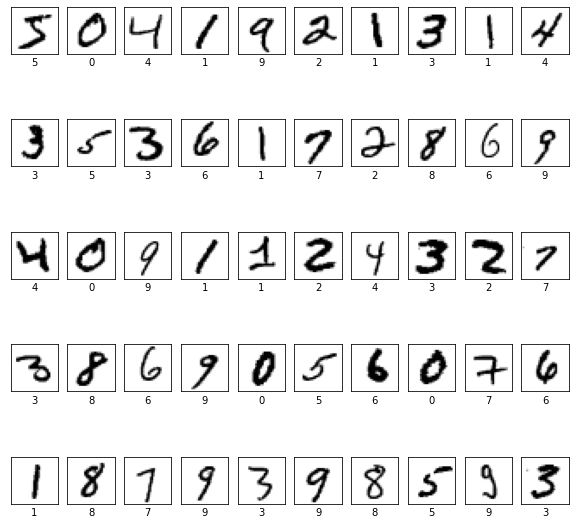

In [8]:
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

In [9]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train / 255 
x_test = x_test / 255 

In [10]:
n = 0
print(y_train[n])

5


In [11]:
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

In [12]:
print(y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [13]:
model = Sequential() # Создаем последовательную модель нейронной сети
model.add(Dense(400, input_dim=784, activation="tanh")) # Входной полносвязный слой, 400 нейронов, 784 входа в каждый нейрон
model.add(Dense(400, input_dim=800, activation="tanh")) # 1 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 2 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 3 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 4 скрытый слой
model.add(Dense(400, input_dim=800, activation="tanh")) # 5 скрытый слой
model.add(Dense(10, activation="softmax")) # Выходной полносвязный слой, 10 нейронов (по количеству классов)

In [14]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"]) 

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 400)               160400    
                                                                 
 dense_2 (Dense)             (None, 400)               160400    
                                                                 
 dense_3 (Dense)             (None, 400)               160400    
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dense_5 (Dense)             (None, 400)               160400    
                                                                 
 dense_6 (Dense)             (None, 10)                4

In [18]:
history = model.fit(x_train, y_train, 
                    batch_size=200, 
                    epochs=30,
                    validation_split=0.2, # Доля валидационной выборки для контроля переобучения
                    verbose=1) #verbose=0 ничего не покажет, verbose=1 покажет анимированный индикатор выполнения (progress_bar), verbose=2 будет просто указать номер эпохи

Epoch 1/30
240/240 [==============================] - 3s 11ms/step - loss: 0.1685 - accuracy: 0.9508 - val_loss: 0.1784 - val_accuracy: 0.9503
Epoch 2/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1634 - accuracy: 0.9525 - val_loss: 0.1749 - val_accuracy: 0.9503
Epoch 3/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1583 - accuracy: 0.9539 - val_loss: 0.1713 - val_accuracy: 0.9515
Epoch 4/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1534 - accuracy: 0.9554 - val_loss: 0.1690 - val_accuracy: 0.9523
Epoch 5/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1488 - accuracy: 0.9565 - val_loss: 0.1632 - val_accuracy: 0.9539
Epoch 6/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1444 - accuracy: 0.9581 - val_loss: 0.1606 - val_accuracy: 0.9555
Epoch 7/30
240/240 [==============================] - 2s 8ms/step - loss: 0.1400 - accuracy: 0.9595 - val_loss: 0.1568 - val_accuracy: 0.9559
Epoch

In [19]:
scores = model.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

313/313 [==============================] - 1s 4ms/step - loss: 0.1068 - accuracy: 0.9686
Доля верных ответов на тестовых данных, в процентах: 96.86


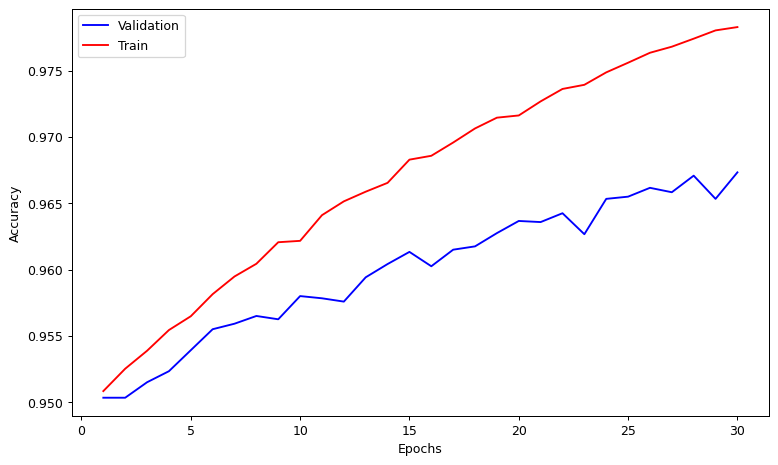

In [20]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values) + 1)
plt.figure(figsize=(10,6), dpi=90)
plt.plot(epochs, val_acc_values, 'b', label='Validation')
plt.plot(epochs, acc_values, 'r', label='Train')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [21]:
n_test = 1
x = x_test[n_test]
x = np.expand_dims(x, axis=0)
prediction = model.predict(x)
prediction

array([[6.8785237e-05, 1.5355024e-03, 9.9523997e-01, 2.0568781e-03,
        4.9451523e-09, 6.3063118e-05, 2.3331119e-04, 1.6860749e-10,
        8.0242648e-04, 3.9292736e-08]], dtype=float32)

In [22]:
prediction = np.argmax(prediction[0])
print("Название класса:", classes[prediction])

Название класса: 2


In [23]:
img_path = '0.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 0


In [24]:
img_path = '1.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 6


In [25]:
img_path = '2.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 2


In [26]:
img_path = '3.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


In [27]:
img_path = '4.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


In [28]:
img_path = '5.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 5


In [29]:
img_path = '6.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 6


In [30]:
img_path = '7.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 2


In [31]:
img_path = '8.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


In [32]:
img_path = '9.jpg'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255
prediction = model.predict(x)
prediction = np.argmax(prediction)
print("Название класса:", classes[prediction])

Название класса: 3


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


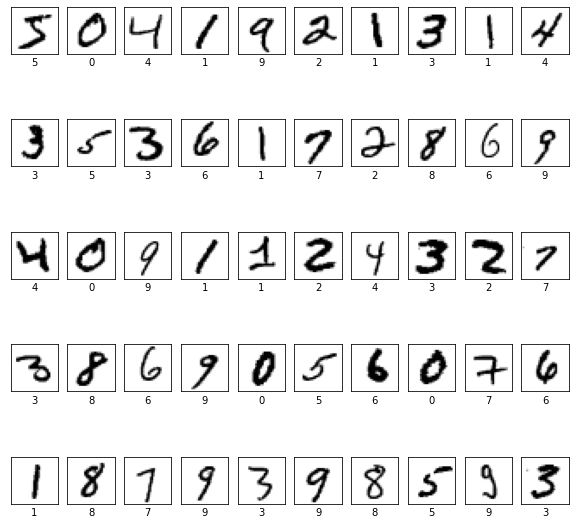

In [33]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train[n])

In [34]:
# Создаем последовательную модель нейронной сети
model = Sequential()
# Первый сверточный слой
model.add(Conv2D(img_rows, (3, 3), padding='same',
                        input_shape=(img_rows, img_cols, 1), activation='relu'))
# Второй сверточный слой
model.add(Conv2D(img_rows, (3, 3), activation='relu', padding='same'))
# Первый слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))

# Третий сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), padding='same', activation='relu'))
# Четвертый сверточный слой
model.add(Conv2D(2 * img_rows, (3, 3), activation='relu'))
# Второй слой подвыборки
model.add(MaxPooling2D(pool_size=(2, 2)))
# Слой регуляризации Dropout
model.add(Dropout(0.25))
# Слой преобразования данных из 2D представления в плоское
model.add(Flatten())
# Полносвязный слой для классификации
model.add(Dense(8 * img_rows, activation='relu'))
# Слой регуляризации Dropout
model.add(Dropout(0.5))
# Выходной полносвязный слой
model.add(Dense(nb_classes, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 28)        7084      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 28)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 28)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 56)        14168     
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 56)        28280     
                                                      

In [36]:
history = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=nb_epoch,
              validation_split=0.2,
              shuffle=True,
              verbose=2)

Epoch 1/25
480/480 - 16s - loss: 0.2664 - accuracy: 0.9153 - val_loss: 0.0534 - val_accuracy: 0.9841 - 16s/epoch - 34ms/step
Epoch 2/25
480/480 - 8s - loss: 0.0849 - accuracy: 0.9754 - val_loss: 0.0429 - val_accuracy: 0.9868 - 8s/epoch - 17ms/step
Epoch 3/25
480/480 - 7s - loss: 0.0600 - accuracy: 0.9815 - val_loss: 0.0345 - val_accuracy: 0.9905 - 7s/epoch - 15ms/step
Epoch 4/25
480/480 - 7s - loss: 0.0487 - accuracy: 0.9852 - val_loss: 0.0330 - val_accuracy: 0.9910 - 7s/epoch - 15ms/step
Epoch 5/25
480/480 - 8s - loss: 0.0416 - accuracy: 0.9871 - val_loss: 0.0323 - val_accuracy: 0.9918 - 8s/epoch - 16ms/step
Epoch 6/25
480/480 - 7s - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0334 - val_accuracy: 0.9914 - 7s/epoch - 15ms/step
Epoch 7/25
480/480 - 7s - loss: 0.0320 - accuracy: 0.9899 - val_loss: 0.0275 - val_accuracy: 0.9931 - 7s/epoch - 15ms/step
Epoch 8/25
480/480 - 8s - loss: 0.0313 - accuracy: 0.9902 - val_loss: 0.0250 - val_accuracy: 0.9938 - 8s/epoch - 16ms/step
Epoch 9/25
480

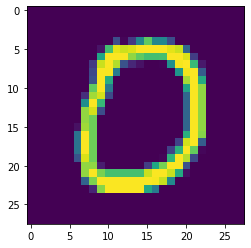

In [45]:
n = 10
plt.imshow(x_test[n])
plt.show()

In [48]:
x = x_test[n]
x = np.expand_dims(x, axis=0)

In [49]:
prediction = model.predict(x)

In [50]:
print(prediction)

[[1.0000000e+00 4.1611643e-18 8.6840751e-16 4.6583793e-19 4.5816661e-18
  3.5528147e-19 2.7595406e-15 1.1919772e-15 3.9602513e-17 3.0585311e-12]]


In [51]:
prediction = np.argmax(prediction)
print(classes[prediction])

0


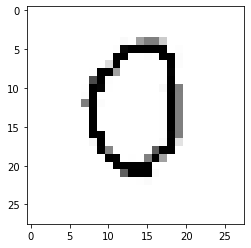

In [52]:
img_path = '0.jpg'
img = image.load_img(img_path, target_size=(28, 28))
plt.imshow(img)
plt.show()

In [61]:
x = image.img_to_array(img)
x = x.astype('float32')
x /= 255
x = np.expand_dims(x, axis=0)

In [63]:
prediction = model.predict(x)
prediction = np.argmax(prediction)
print(classes[prediction])

ValueError: ignored